In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xesmf as xe
import cartopy.crs as ccrs

ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

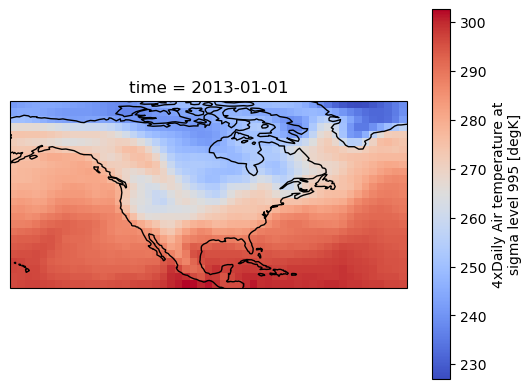

In [2]:
plt.Figure
ax = plt.axes(projection=ccrs.PlateCarree())
ds.air.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()

In [3]:
ds_out = xr.Dataset(
    {
    'lon': (['lon'], np.arange(0, 360, 1)),
    'lat': (['lat'], np.arange(-90, 90, 1)),
    }
)

regridder = xe.Regridder(ds, ds_out, 'bilinear', reuse_weights=False)
ds_regrid = regridder(ds)
ds_regrid

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 2920, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lon      (lon) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * lat      (lat) int64 1kB -90 -89 -88 -87 -86 -85 -84 ... 84 85 86 87 88 89
Data variables:
    air      (time, lat, lon) float64 2GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    regrid_method:  bilinear

In [4]:
ds.data_vars

Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7

In [5]:
# verify that the result is the same as regridding each variable one-by-one
for k in ds.data_vars:
    print(k, ds_regrid[k].equals(regridder(ds[k])))

air True


In [9]:
# xESMF doesn't like horizontal dimensions to be the first/leftmost dimensions
ds_bad = ds.copy()
ds_bad["air"] = ds_bad["air"].transpose()
ds_bad
#regridder(ds_bad)  # this will raise an error (?)

<xarray.Dataset> Size: 31MB
Dimensions:  (lon: 53, lat: 25, time: 2920)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (lon, lat, time) float64 31MB 241.2 242.1 242.3 ... 295.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [26]:
ds_bad

<xarray.Dataset> Size: 31MB
Dimensions:  (lon: 53, lat: 25, time: 2920)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (lon, lat, time) float64 31MB 241.2 242.1 242.3 ... 295.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...